In [1]:
import gmplot
import pandas as pd
import requests 
import os
import math
from xml.etree.ElementTree import fromstring, ElementTree
from datetime import datetime
import json
import statistics 
from collections import Counter
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TrafficEvents = None

chunk_size = 1000

BASE_PATH = "/home/amin/CETI/RoadConstruction/TrafficEventData/part/speeds/speed_"
    
index_folder = 0
index_start_point_file = 0
index_end_point_file = 411

In [3]:
def read_data(path):
    data = None
    data = pd.read_csv(path)
    return data

In [4]:
def read_part_data(folder_id, index_start, index_end):
    df = None
    print("start time is {}".format(datetime.now()))
    for i in range(index_start, index_end):
        type_of_ways_all_points = []
        path = BASE_PATH + str(folder_id) + "/" + str(i) + "_file_"+ str(i) + ".csv"

        data = read_data(path)
        df = data.append(df, ignore_index = True)
    print("end time is {}".format(datetime.now()))
    return df

In [5]:
df = None
for i in range(0,9):
    print(i)
    data = read_part_data(i, 0, 411)
    df = data.append(df, ignore_index = True)
print(9)
data = read_part_data(9, 0, 393)
df = data.append(df, ignore_index = True)

0
start time is 2020-09-17 13:19:32.902425
end time is 2020-09-17 13:21:06.724040
1
start time is 2020-09-17 13:21:07.016709
end time is 2020-09-17 13:22:36.309480
2
start time is 2020-09-17 13:22:37.069291
end time is 2020-09-17 13:24:05.658312
3
start time is 2020-09-17 13:24:06.787918
end time is 2020-09-17 13:25:35.962620
4
start time is 2020-09-17 13:25:37.477508
end time is 2020-09-17 13:27:06.343189
5
start time is 2020-09-17 13:27:08.391496
end time is 2020-09-17 13:28:36.885299
6
start time is 2020-09-17 13:28:39.479709
end time is 2020-09-17 13:30:06.846691
7
start time is 2020-09-17 13:30:09.931228
end time is 2020-09-17 13:31:41.780114
8
start time is 2020-09-17 13:31:45.660831
end time is 2020-09-17 13:33:22.122974
9
start time is 2020-09-17 13:33:26.424062
end time is 2020-09-17 13:34:53.435066


In [6]:
df.head(10)

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Circle,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta
0,M-29450881,MapQuest,Construction,406.0,3,44.309494,-90.840271,NaN,NaN,0.86,...,False,False,"{'waypoints': [{'nodes': [2147408021, 47184371...","{'waypoints': [{'nodes': [2147408021, 47184371...","[2147408021, 471843710, 2147408024, 2147408021...","[2147408021, 471843710, 2147408024, 2147408021...",motorway_link,-100.0,-100.0,-100.0
1,M-29450890,MapQuest,Construction,703.0,2,44.387669,-88.720055,NaN,NaN,0.12,...,False,False,"{'waypoints': [{'nodes': [232006634, 232006479...","{'waypoints': [{'nodes': [232006634, 232006479...","[232006634, 232006479, 2281677742, 232006634, ...","[232006634, 232006479, 2281677742, 232006634, ...",trunk,-100.0,-100.0,-100.0
2,M-29450891,MapQuest,Construction,703.0,2,44.403862,-88.734856,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [232006387, 232006382...","{'waypoints': [{'nodes': [232006387, 232006382...","[232006387, 232006382, 232006382, 231764181, 2...","[232006387, 232006382, 232006382, 231764181, 2...",trunk,-100.0,-100.0,-100.0
3,M-29450947,MapQuest,Construction,735.0,3,44.734169,-90.497337,NaN,NaN,0.10,...,False,False,"{'waypoints': [{'nodes': [147039746, 147017038...","{'waypoints': [{'nodes': [147039746, 147017038...","[147039746, 147017038, 147017038, 147017035, 1...","[147039746, 147017038, 147017038, 147017035, 1...",residential,-100.0,-100.0,-100.0
4,M-29450948,MapQuest,Construction,735.0,3,44.734177,-90.496017,NaN,NaN,0.10,...,False,False,"{'waypoints': [{'nodes': [3372527386, 14701703...","{'waypoints': [{'nodes': [3372527386, 14701703...","[3372527386, 147017032, 3372527390, 147017032,...","[3372527386, 147017032, 3372527390, 147017032,...",primary,-100.0,-100.0,-100.0
5,M-29452018,MapQuest,Construction,641.0,2,43.074471,-88.066605,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [0, 196651378], 'hint...","{'waypoints': [{'nodes': [0, 196651378], 'hint...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...","[0, 196651378, 0, 233349076, 0, 196651380, 0, ...",None,-100.0,-100.0,-100.0
6,M-29452119,MapQuest,Construction,701.0,2,42.353142,-87.977654,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [235603291, 235603296...","{'waypoints': [{'nodes': [235603291, 235603296...","[235603291, 235603296, 235603291, 235587571, 7...","[235603291, 235603296, 235603291, 235587571, 7...",secondary,-100.0,-100.0,-100.0
7,M-29452120,MapQuest,Construction,701.0,2,42.385311,-87.963326,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [1514677298, 23544272...","{'waypoints': [{'nodes': [1514677298, 23544272...","[1514677298, 235442729, 0, 1514677298, 1514677...","[1514677298, 235442729, 0, 1514677298, 1514677...",primary,-100.0,-100.0,-100.0
8,M-29452121,MapQuest,Construction,500.0,2,42.346806,-87.902145,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [235210040, 181946597...","{'waypoints': [{'nodes': [235210040, 181946597...","[235210040, 1819465977, 726669678, 726669806, ...","[235210040, 1819465977, 726669678, 726669806, ...",trunk_link,-100.0,-100.0,-100.0
9,M-29452122,MapQuest,Construction,701.0,2,42.716621,-88.225945,NaN,NaN,0.00,...,False,False,"{'waypoints': [{'nodes': [992846309, 473621036...","{'waypoints': [{'nodes': [992846309, 473621036...","[992846309, 4736210361, 1073297157, 1102350902...","[992846309, 4736210361, 1073297157, 1102350902...",trunk,-100.0,-100.0,-100.0


In [7]:
df.shape

(2046000, 66)

In [11]:
df = df[df.avg_speed != -100]

In [13]:
df.shape

(1417270, 67)

In [14]:
df["avg_speed_km"] = df["avg_speed"] * 3.6 

In [15]:
df.head()

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,Turning_Loop,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta,avg_speed_km
476000,B-8859744,Bing,Construction,NaN,4,29.694795,-95.285907,29.703750,-95.298030,0.955098,...,False,"{'waypoints': [{'nodes': [151426337, 182230863...","{'waypoints': [{'nodes': [1503516158, 15035161...","[151426337, 1822308632, 0, 151426337, 15142634...","[1503516158, 1503516147, 3830978643, 151942428...",motorway,24.350158,1543.8,63.4,87.660568
476001,B-8859745,Bing,Construction,NaN,2,29.777300,-95.855590,29.767410,-95.361600,29.634138,...,False,"{'waypoints': [{'nodes': [2207119996, 26376719...","{'waypoints': [{'nodes': [0, 1197358854], 'hin...","[2207119996, 2637671910, 224574967, 224574969,...","[0, 1197358854, 152065110, 1197336121, 1519747...",motorway,21.544788,48801.1,2265.1,77.561238
476002,B-8859747,Bing,Construction,NaN,4,29.708340,-95.305360,29.693280,-95.285460,1.584028,...,False,"{'waypoints': [{'nodes': [0, 152066209], 'hint...","{'waypoints': [{'nodes': [0, 151868095], 'hint...","[0, 152066209, 0, 152066209, 1503516145, 15341...","[0, 151868095, 151385121, 151385122, 151887215...",motorway_link,22.470175,2561.6,114.0,80.892632
476003,B-8859749,Bing,Construction,NaN,3,30.637679,-97.826794,30.637681,-97.826919,0.007432,...,False,"{'waypoints': [{'nodes': [152771488, 153162339...","{'waypoints': [{'nodes': [152771488, 153162339...","[152771488, 153162339, 4739059392, 152771488]","[152771488, 153162339, 4739059392, 152771488]",primary,20.000000,12.0,0.6,72.000000
476004,B-8859750,Bing,Construction,NaN,2,29.445395,-95.074387,29.411117,-95.041797,3.074997,...,False,"{'waypoints': [{'nodes': [224528299, 224528284...","{'waypoints': [{'nodes': [0, 4606499420], 'hin...","[224528299, 224528284, 0, 224528299, 224451337...","[0, 4606499420, 4606499420, 4606499419, 0, 562...",residential,23.601239,4953.9,209.9,84.964459


In [42]:
labels = ["{0} - {1}".format(i, i + 9) for i in range(0, 120, 10)]

In [43]:
labels

['0 - 9',
 '10 - 19',
 '20 - 29',
 '30 - 39',
 '40 - 49',
 '50 - 59',
 '60 - 69',
 '70 - 79',
 '80 - 89',
 '90 - 99',
 '100 - 109',
 '110 - 119']

In [44]:
df['speed_group'] = pd.cut(df.avg_speed_km, range(0, 125, 10), right=False, labels=labels)

In [45]:
df.head()

,Id,Source,Type,EventCode,Severity,StartPoint_Lat,StartPoint_Lng,EndPoint_Lat,EndPoint_Lng,Distance(mi),...,nearst_nodes_of_start_point,nearst_nodes_of_end_point,nearst_nodes_ids_of_start_point,nearst_nodes_ids_of_end_point,type_of_roads,avg_speed,distance,eta,avg_speed_km,speed_group
476000,B-8859744,Bing,Construction,NaN,4,29.694795,-95.285907,29.703750,-95.298030,0.955098,...,"{'waypoints': [{'nodes': [151426337, 182230863...","{'waypoints': [{'nodes': [1503516158, 15035161...","[151426337, 1822308632, 0, 151426337, 15142634...","[1503516158, 1503516147, 3830978643, 151942428...",motorway,24.350158,1543.8,63.4,87.660568,80 - 89
476001,B-8859745,Bing,Construction,NaN,2,29.777300,-95.855590,29.767410,-95.361600,29.634138,...,"{'waypoints': [{'nodes': [2207119996, 26376719...","{'waypoints': [{'nodes': [0, 1197358854], 'hin...","[2207119996, 2637671910, 224574967, 224574969,...","[0, 1197358854, 152065110, 1197336121, 1519747...",motorway,21.544788,48801.1,2265.1,77.561238,70 - 79
476002,B-8859747,Bing,Construction,NaN,4,29.708340,-95.305360,29.693280,-95.285460,1.584028,...,"{'waypoints': [{'nodes': [0, 152066209], 'hint...","{'waypoints': [{'nodes': [0, 151868095], 'hint...","[0, 152066209, 0, 152066209, 1503516145, 15341...","[0, 151868095, 151385121, 151385122, 151887215...",motorway_link,22.470175,2561.6,114.0,80.892632,80 - 89
476003,B-8859749,Bing,Construction,NaN,3,30.637679,-97.826794,30.637681,-97.826919,0.007432,...,"{'waypoints': [{'nodes': [152771488, 153162339...","{'waypoints': [{'nodes': [152771488, 153162339...","[152771488, 153162339, 4739059392, 152771488]","[152771488, 153162339, 4739059392, 152771488]",primary,20.000000,12.0,0.6,72.000000,70 - 79
476004,B-8859750,Bing,Construction,NaN,2,29.445395,-95.074387,29.411117,-95.041797,3.074997,...,"{'waypoints': [{'nodes': [224528299, 224528284...","{'waypoints': [{'nodes': [0, 4606499420], 'hin...","[224528299, 224528284, 0, 224528299, 224451337...","[0, 4606499420, 4606499420, 4606499419, 0, 562...",residential,23.601239,4953.9,209.9,84.964459,80 - 89


In [46]:
df_speed_group = df.groupby(["speed_group"])

In [47]:
df_speed_group_count = df_speed_group.size().reset_index(name="counts")

In [48]:
df_speed_group_count.head(20)

,speed_group,counts
0,0 - 9,4904
1,10 - 19,14518
2,20 - 29,62644
3,30 - 39,134542
4,40 - 49,197159
5,50 - 59,263328
6,60 - 69,217295
7,70 - 79,195305
8,80 - 89,233827
9,90 - 99,91710


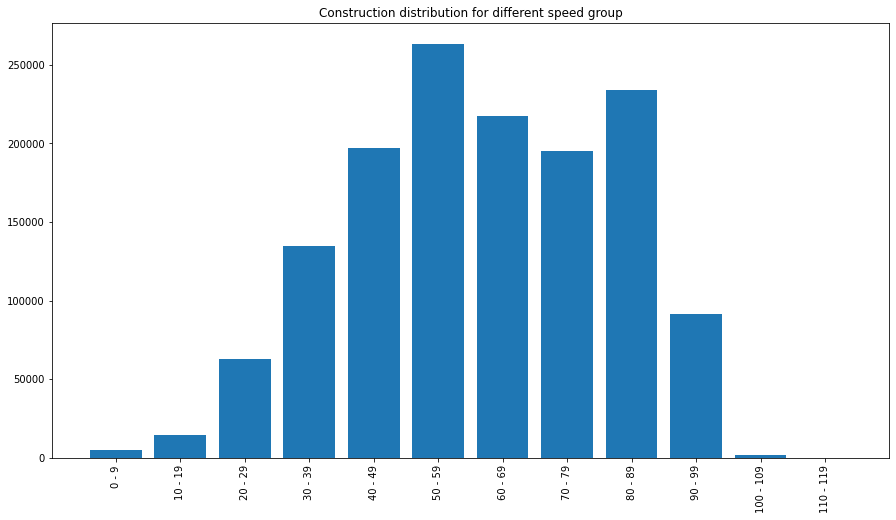

In [49]:
plt.figure(figsize= (15,8))
plt.bar(x=df_speed_group_count['speed_group'], height=df_speed_group_count['counts'])
a = plt.xticks(rotation = 90)
plt.title("Construction distribution for different speed group")
plt.savefig("Construction-distribution-different-speed-group.png")

In [51]:
df_state_speed_group = df.groupby(["State","speed_group"])

In [52]:
df_state_speed_group_count = df_state_speed_group.size().reset_index(name="counts")

In [56]:
States = ["CA", "TX", "FL", "NY", "IL", "PA", "OH", "GA", "NC", "MI", "NJ", "VA", "WA", "AZ", "MA", "TN",
"IN", "MO", "MD", "WI", "CO", "MN", "SC", "AL", "LA", "KY", "OR", "OK", "CT", "UT", "IA", "NV", "AR", "MS",
  "KS", "NM", "NE", "WV", "ID", "HI", "NH", "ME", "MT", "RI", "DE", "SD", "ND", "AK", "VT", "WY"]

In [58]:
States[:5]

['CA', 'TX', 'FL', 'NY', 'IL']

In [55]:
df_state_speed_group_count.head()

,State,speed_group,counts
0,AL,0 - 9,0
1,AL,10 - 19,9
2,AL,20 - 29,25
3,AL,30 - 39,315
4,AL,40 - 49,340


CA
TX
FL
NY
IL
PA
OH
GA
NC
MI
NJ
VA
WA
AZ
MA
TN
IN
MO
MD
WI
CO


<ipython-input-61-79e44dd50886>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize= (15,8))


MN
SC
AL
LA
KY
OR
OK
CT
UT
IA
NV
AR
MS
KS
NM
NE
WV
ID
HI
NH
ME
MT
RI
DE
SD
ND
AK
VT
WY


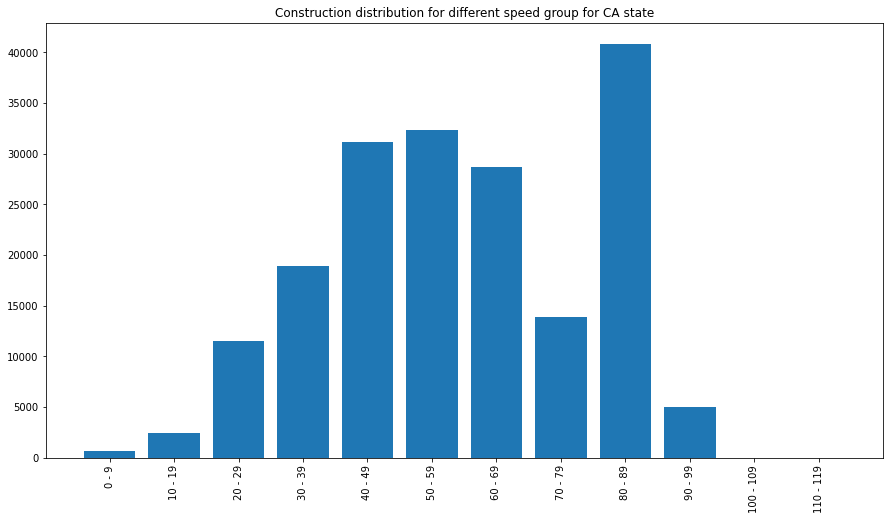

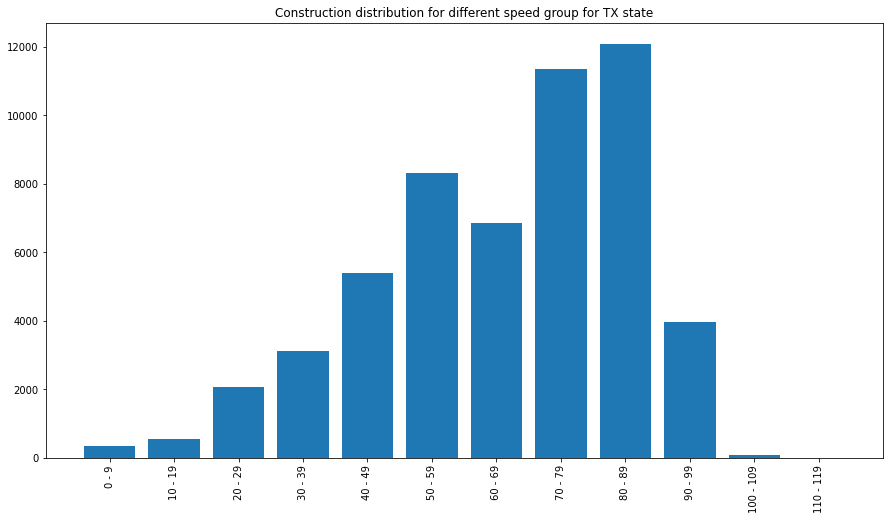

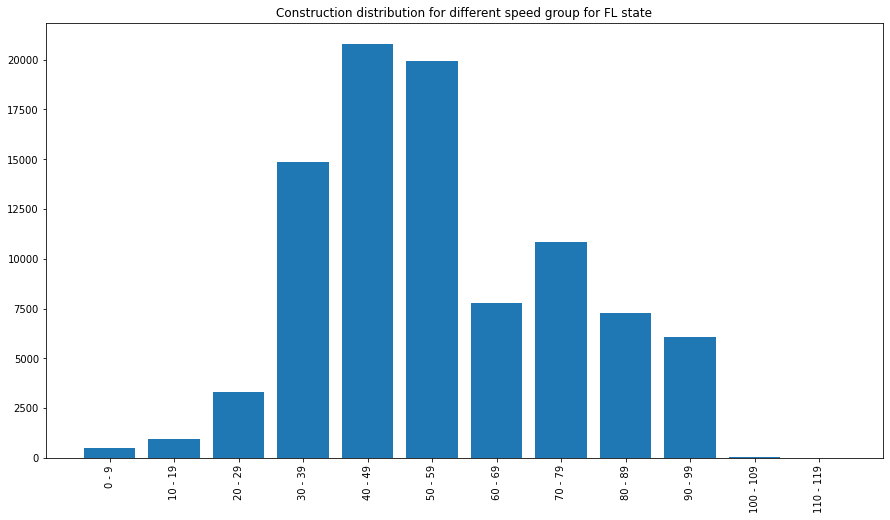

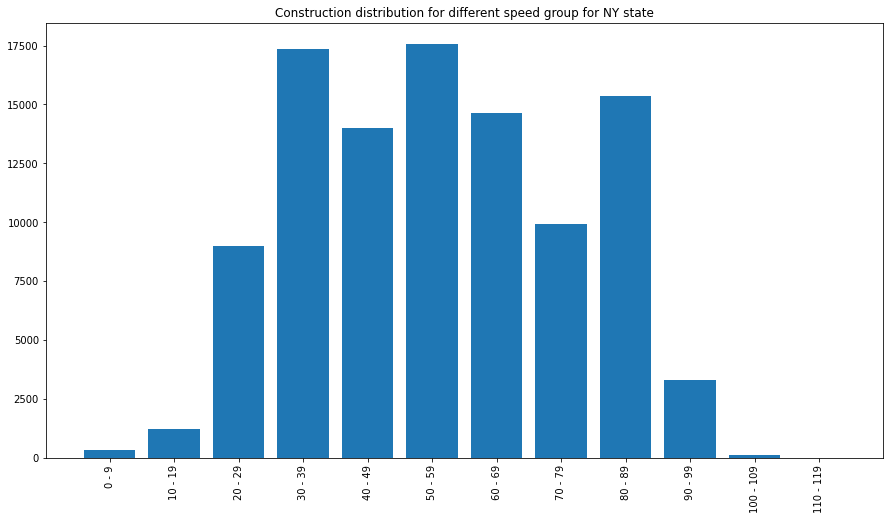

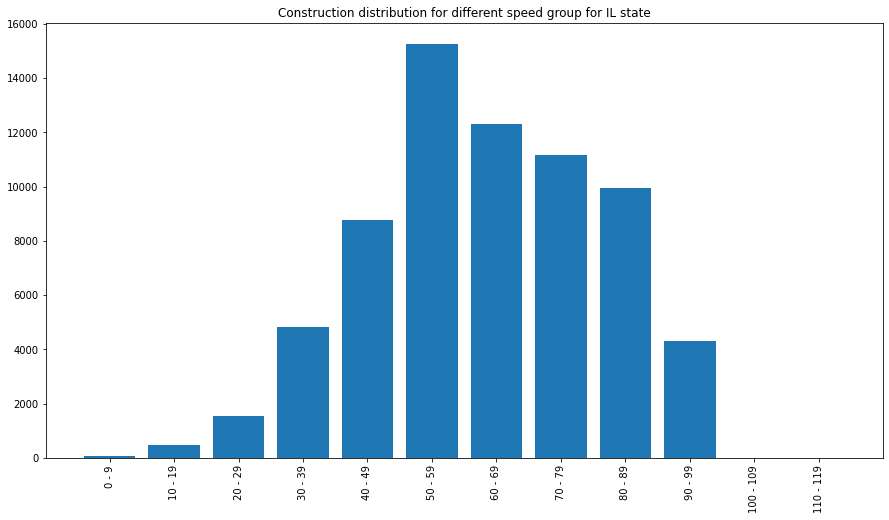

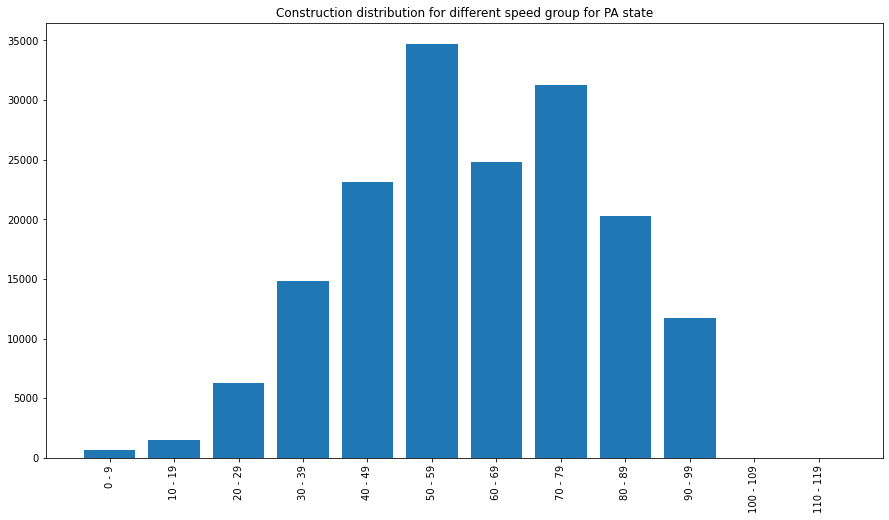

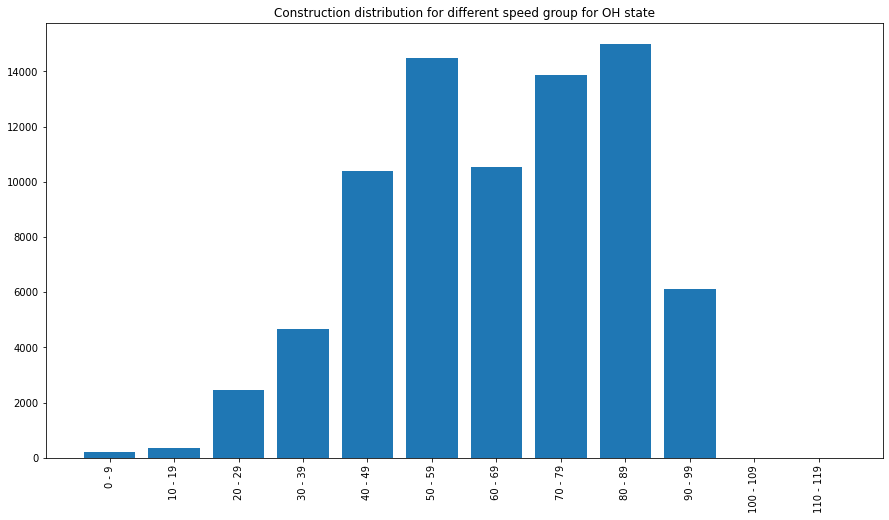

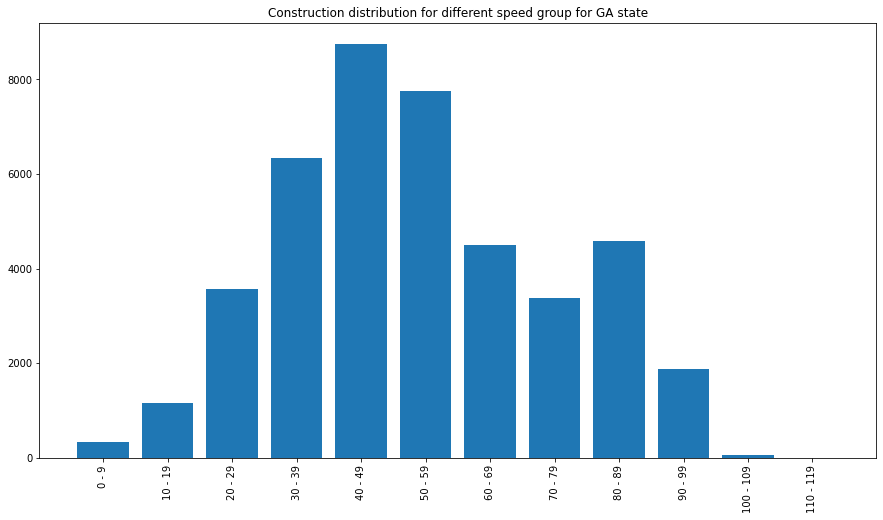

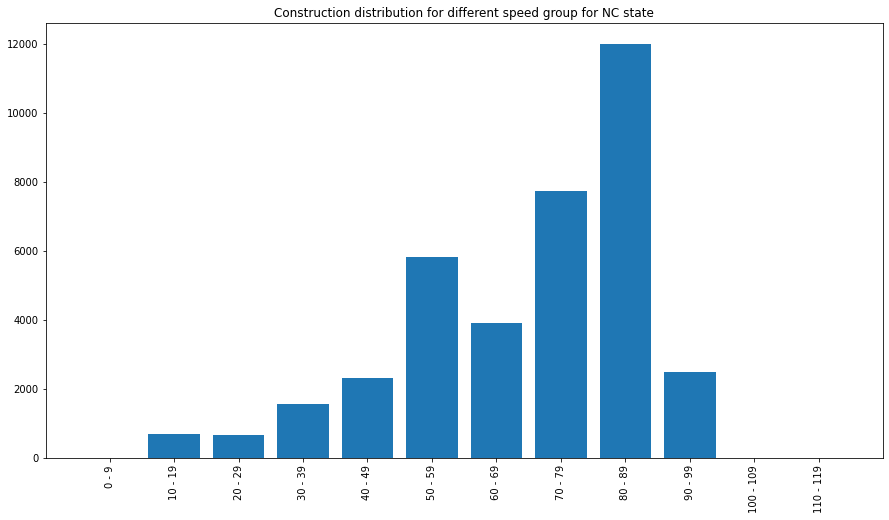

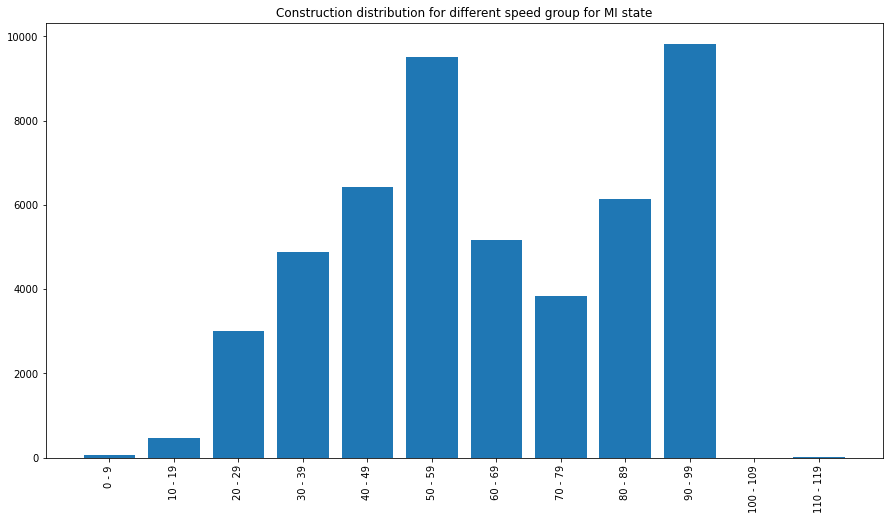

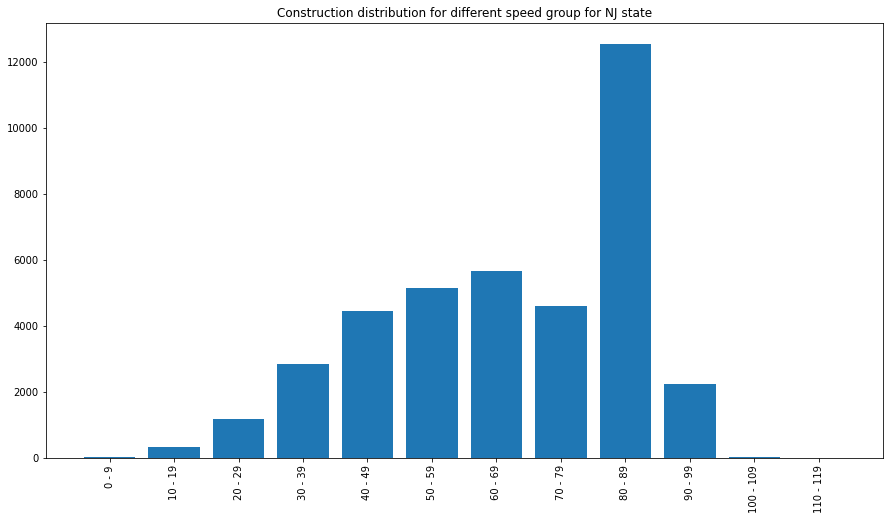

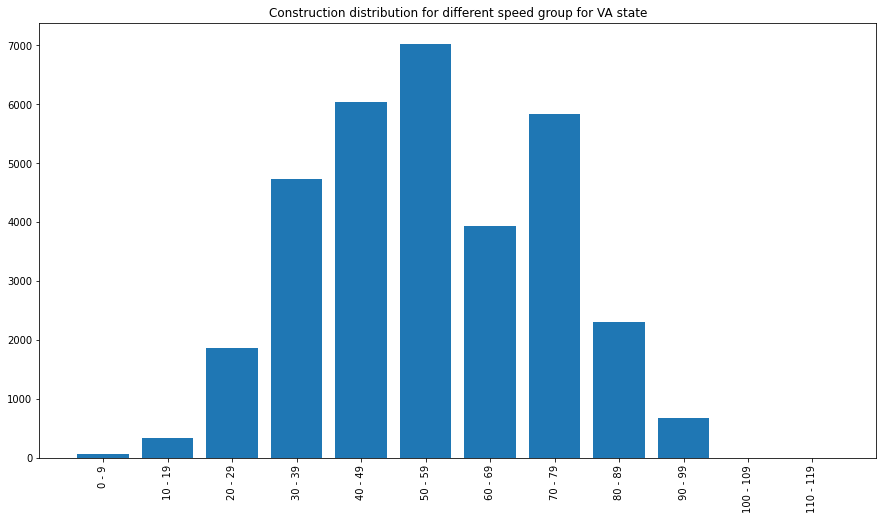

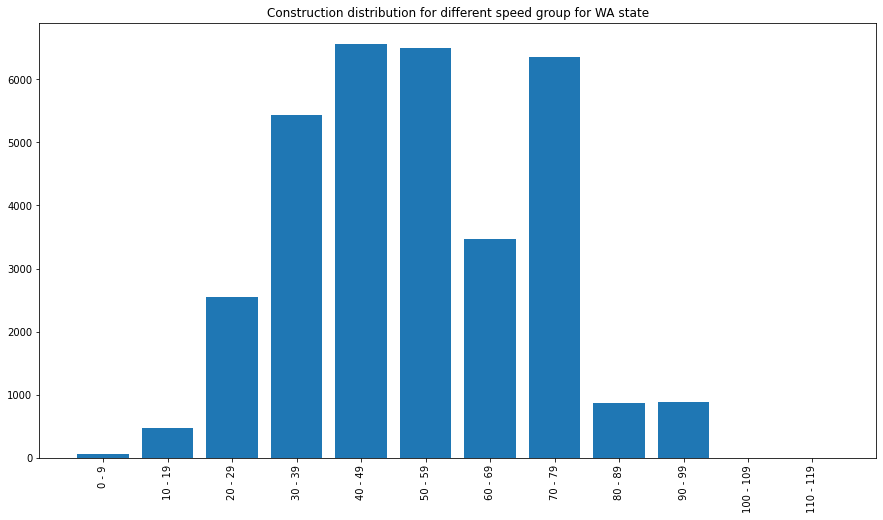

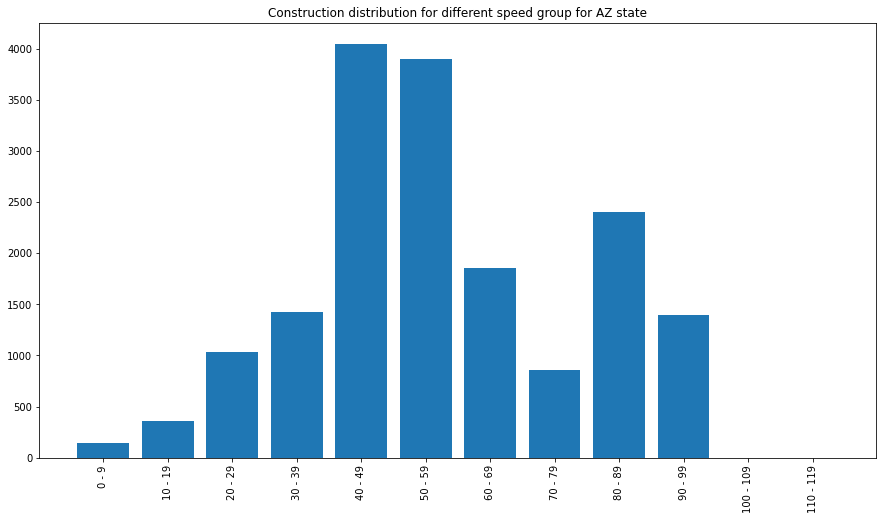

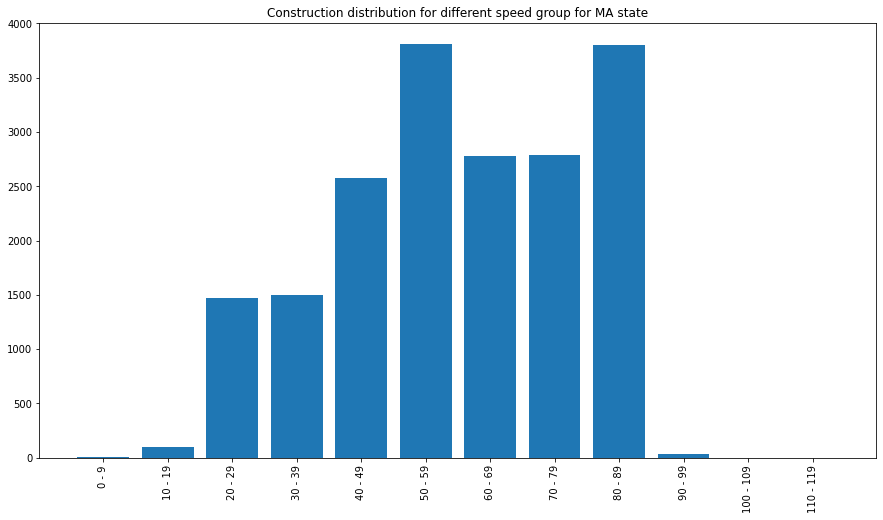

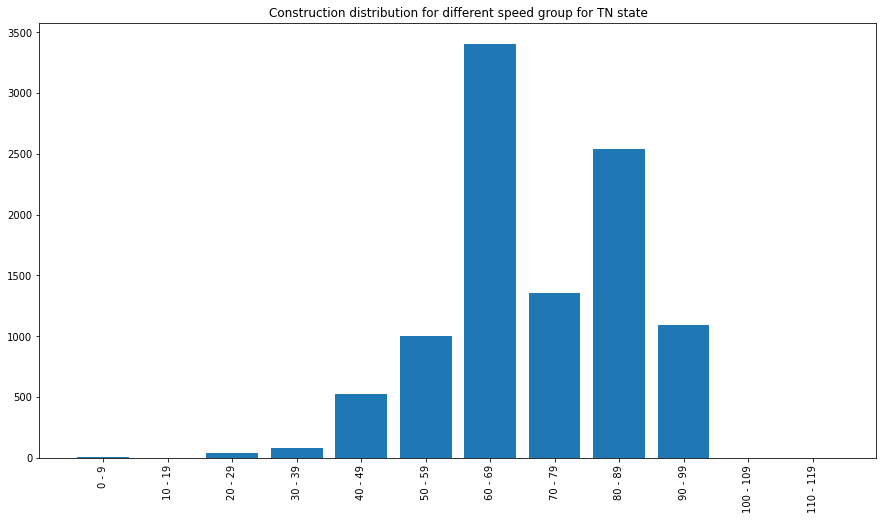

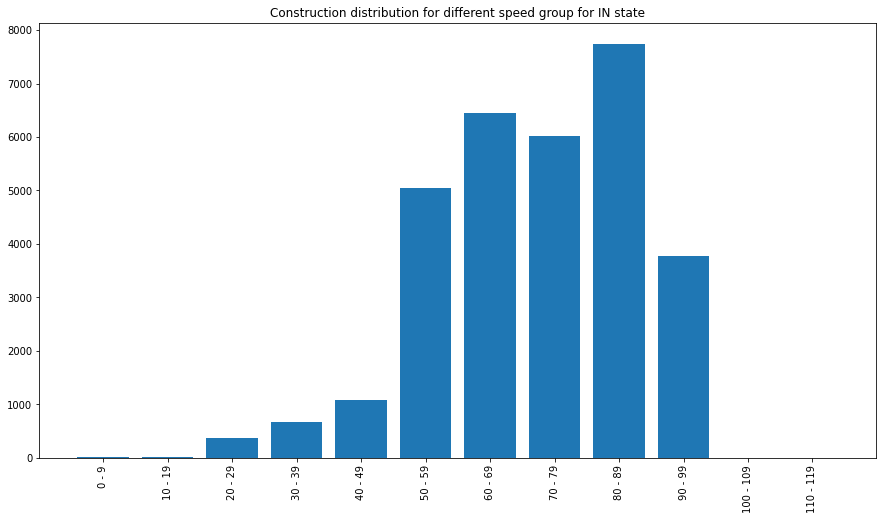

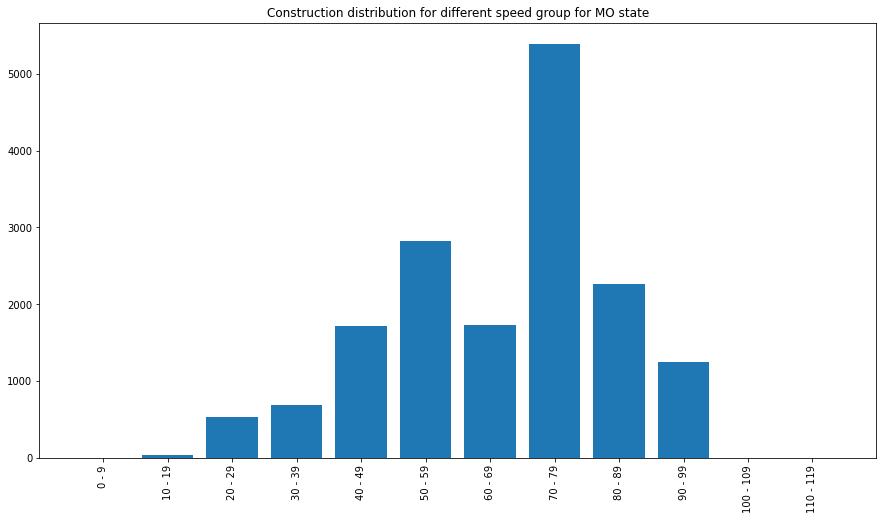

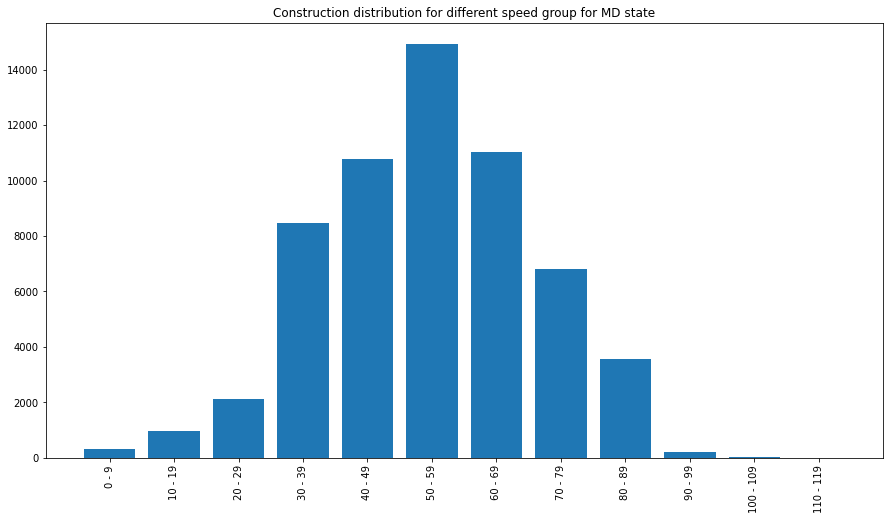

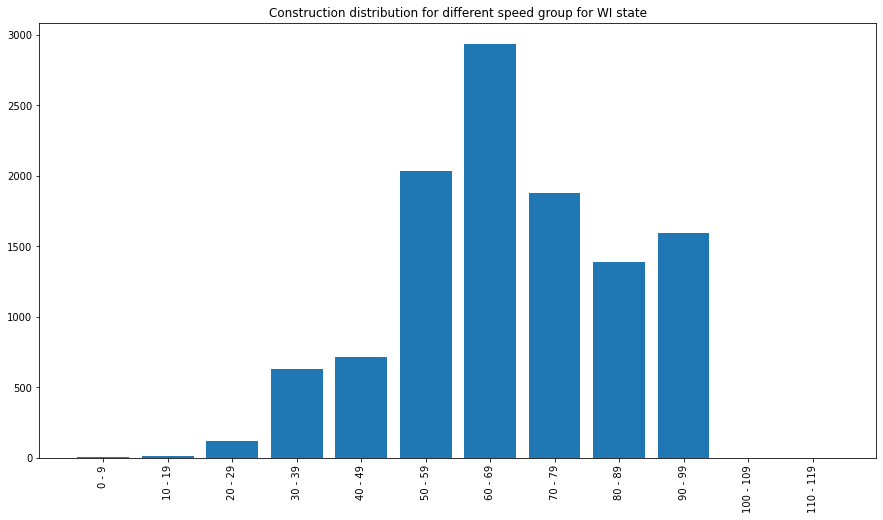

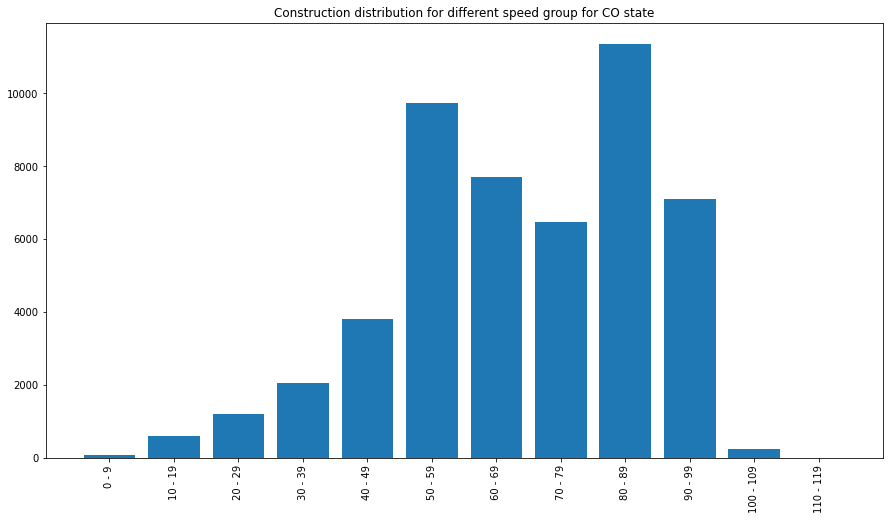

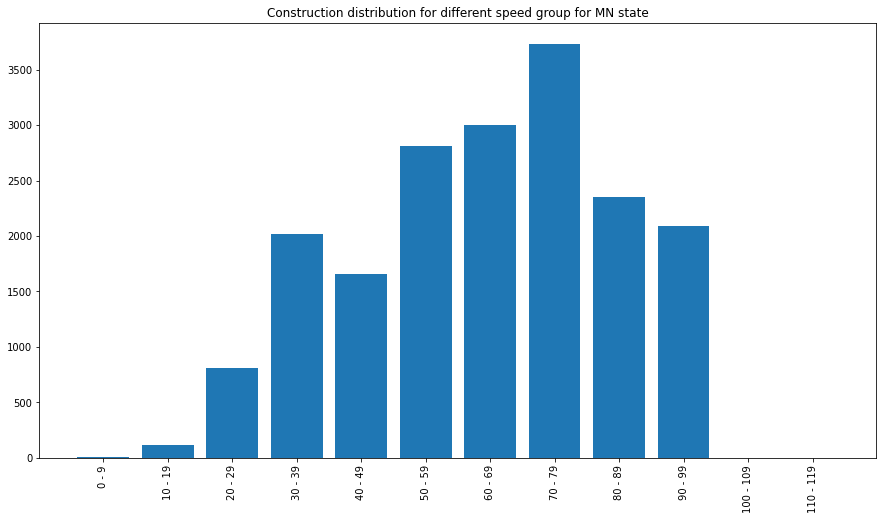

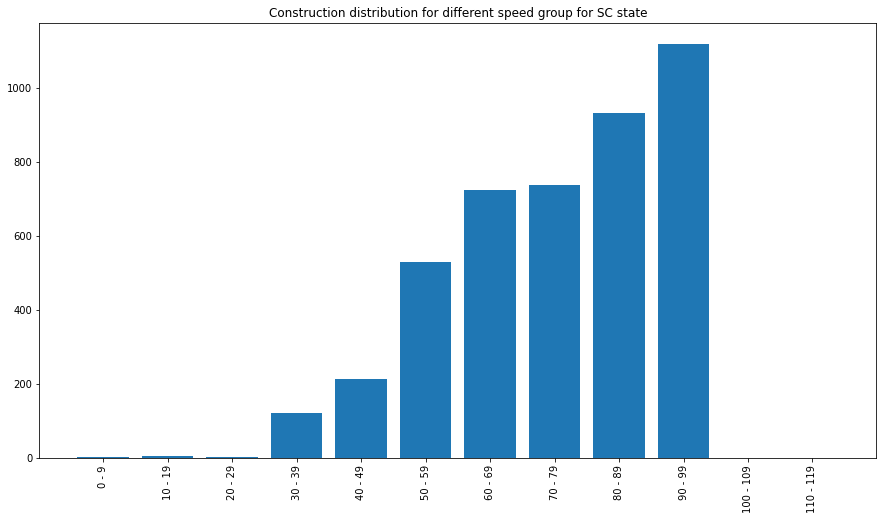

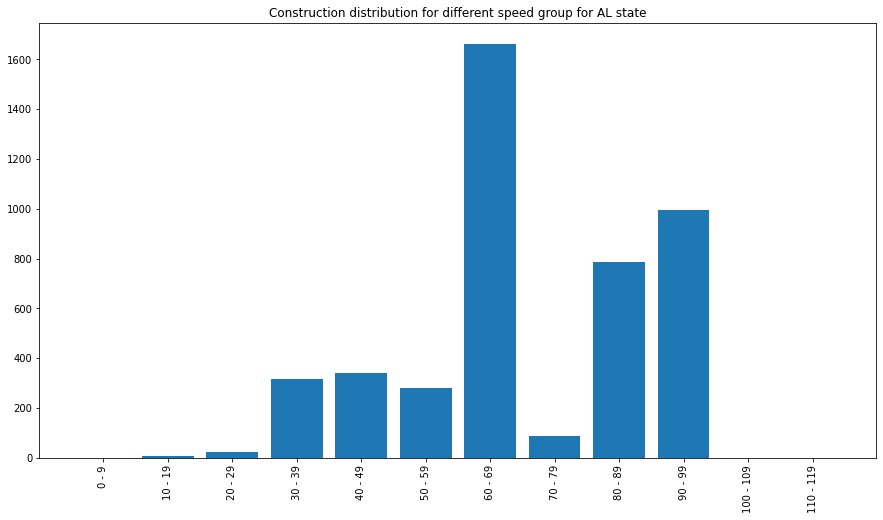

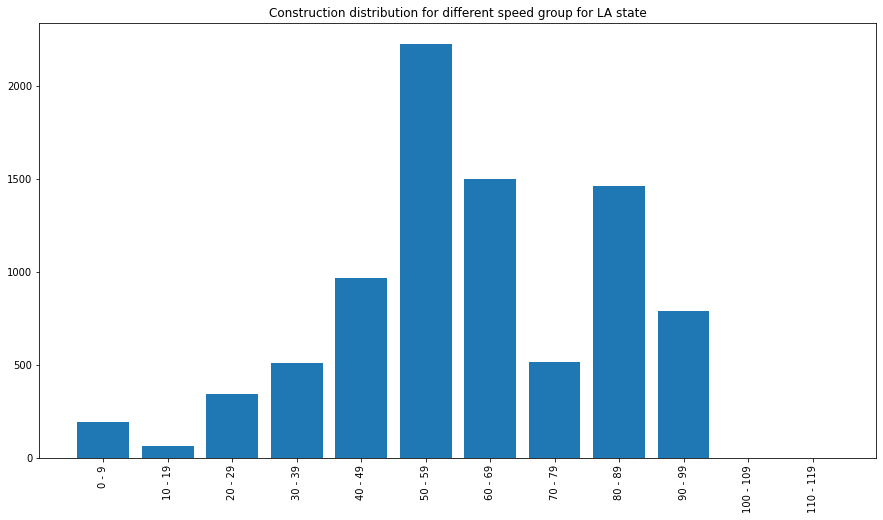

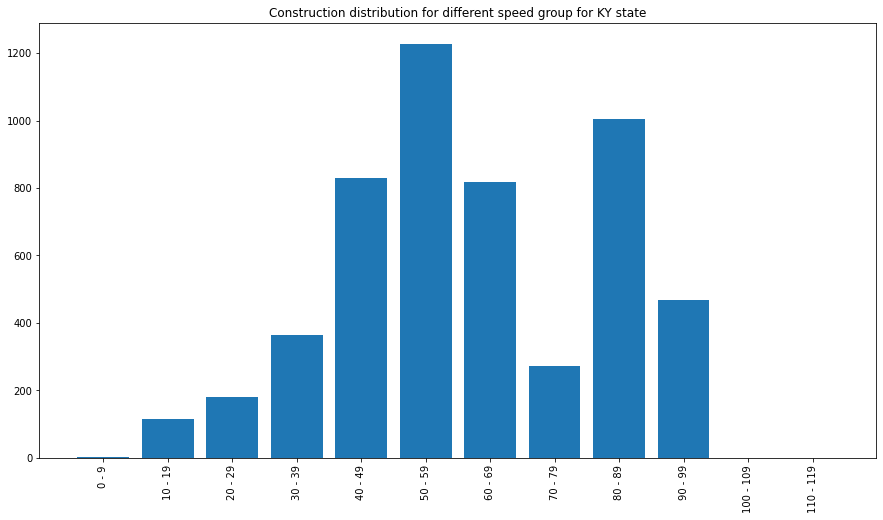

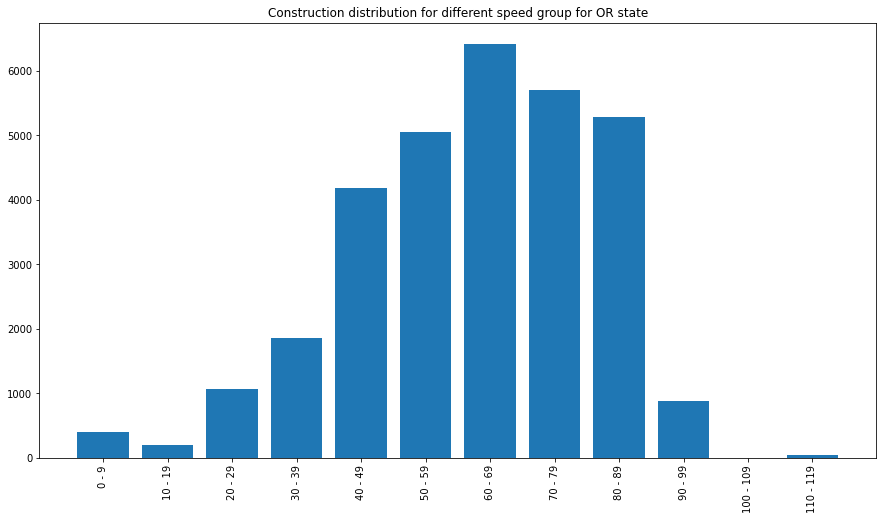

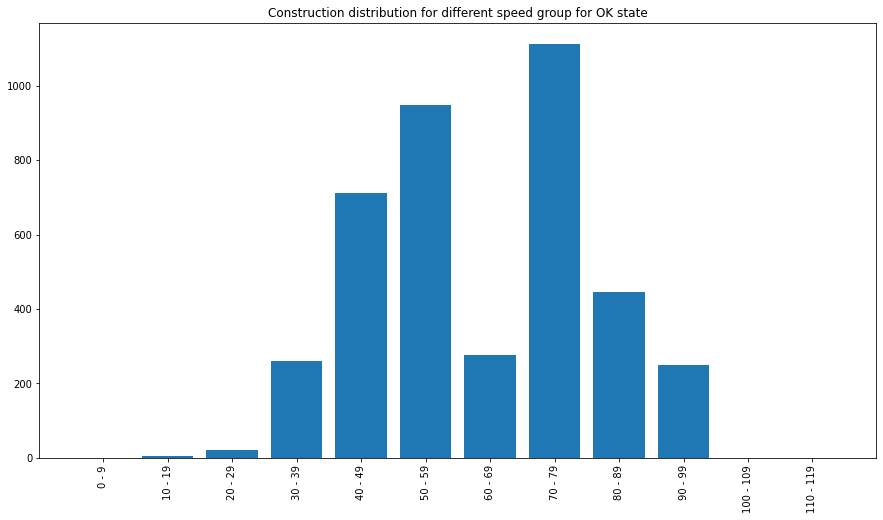

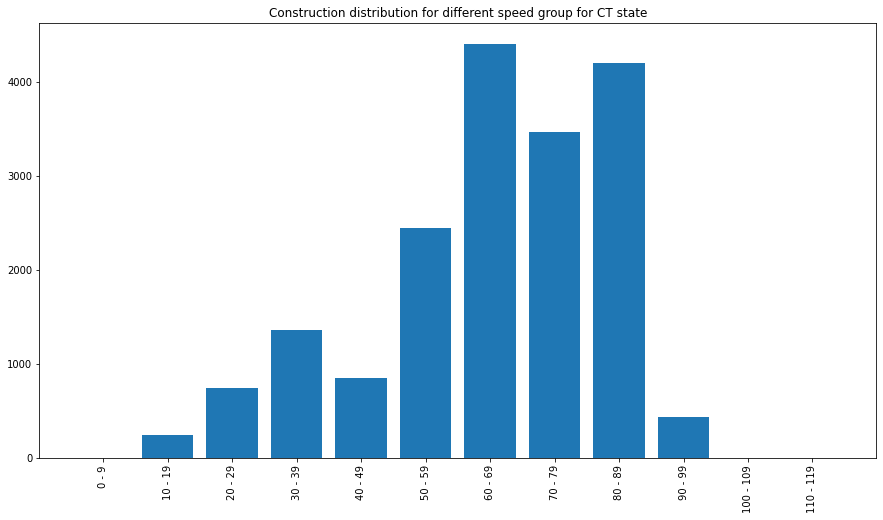

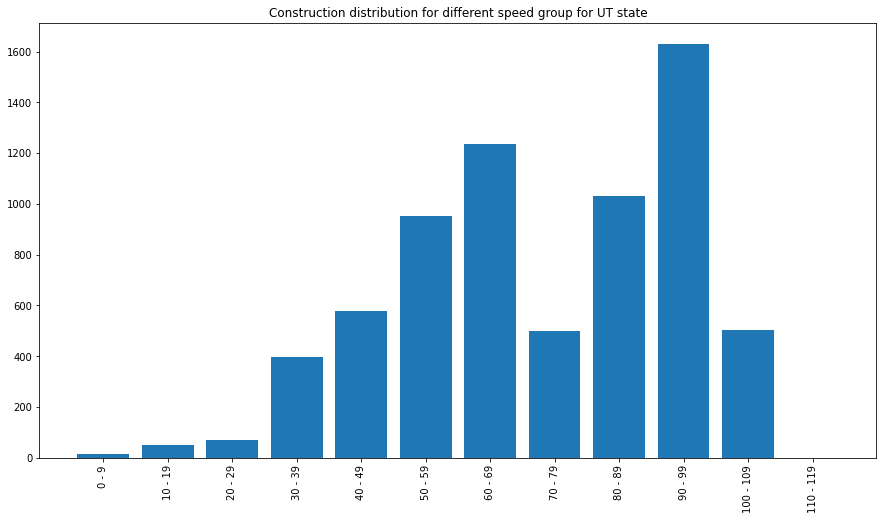

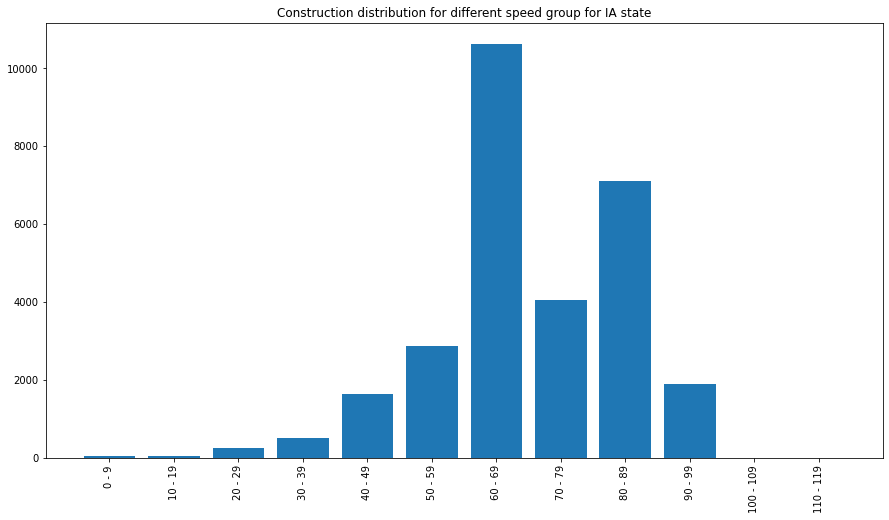

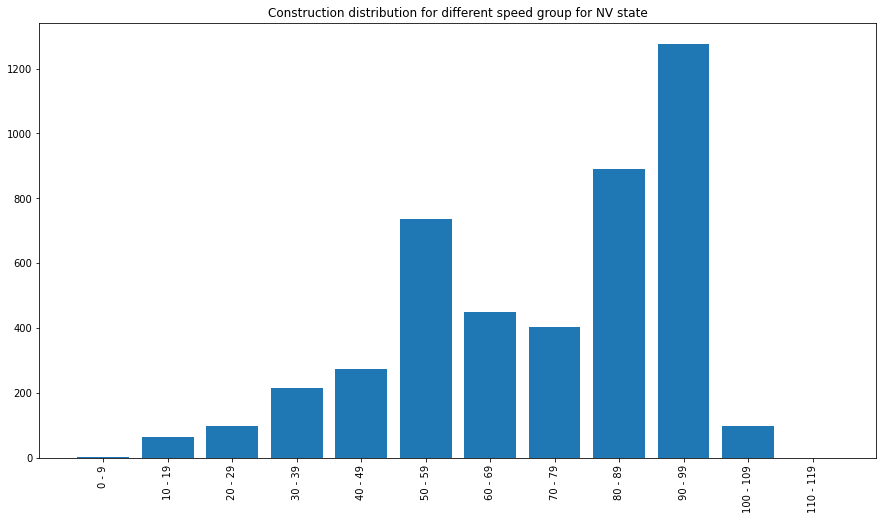

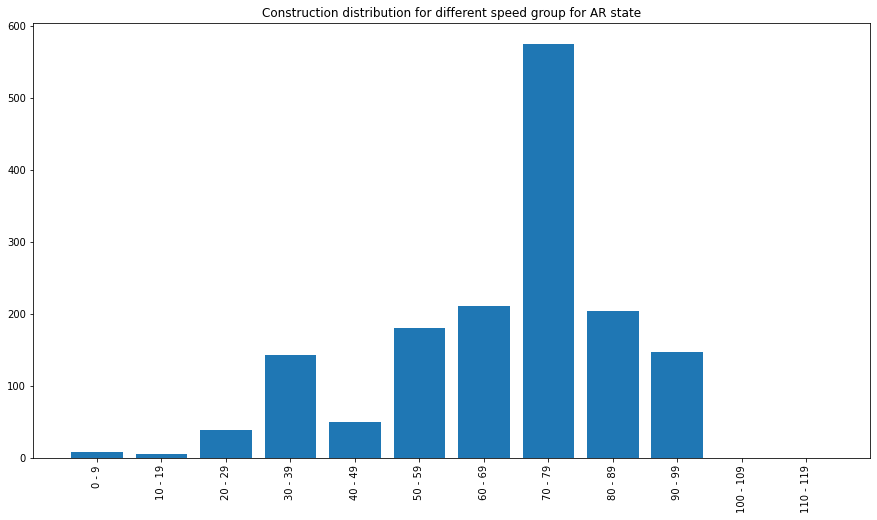

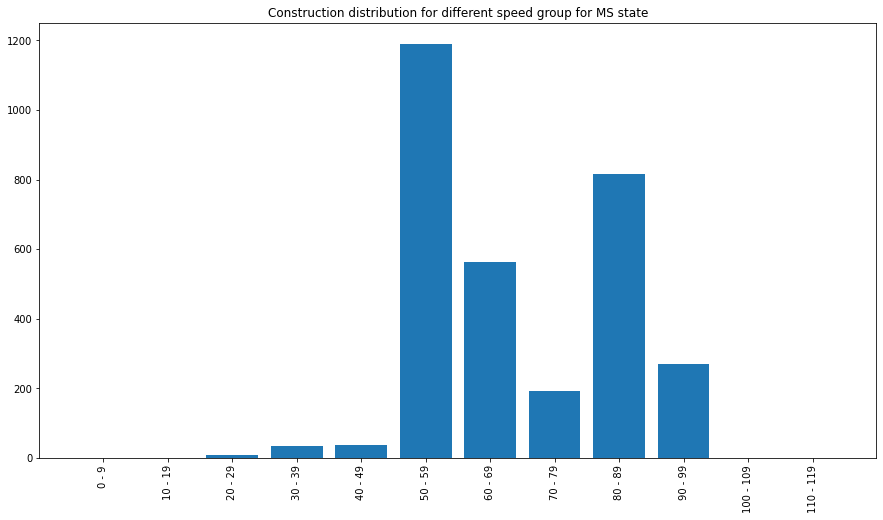

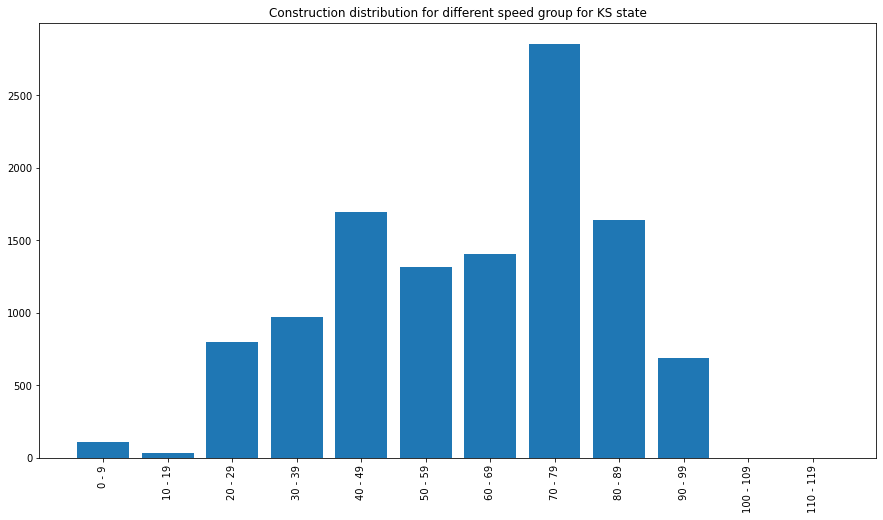

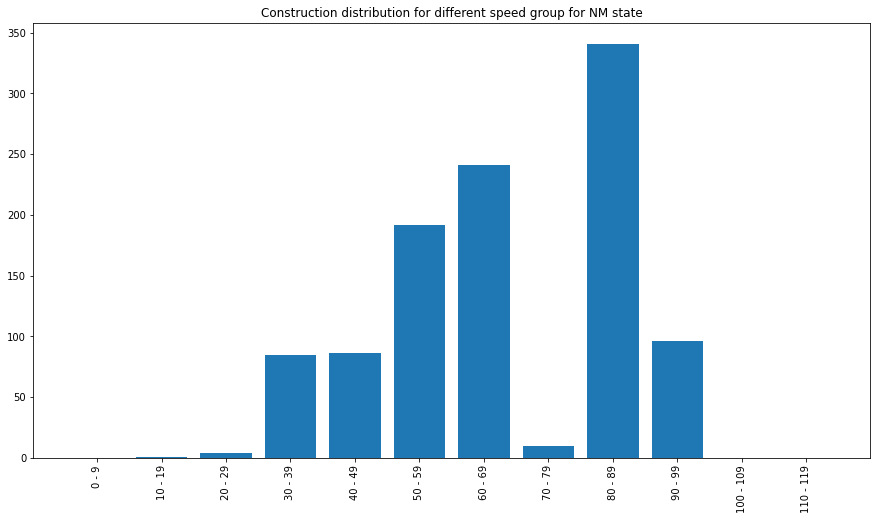

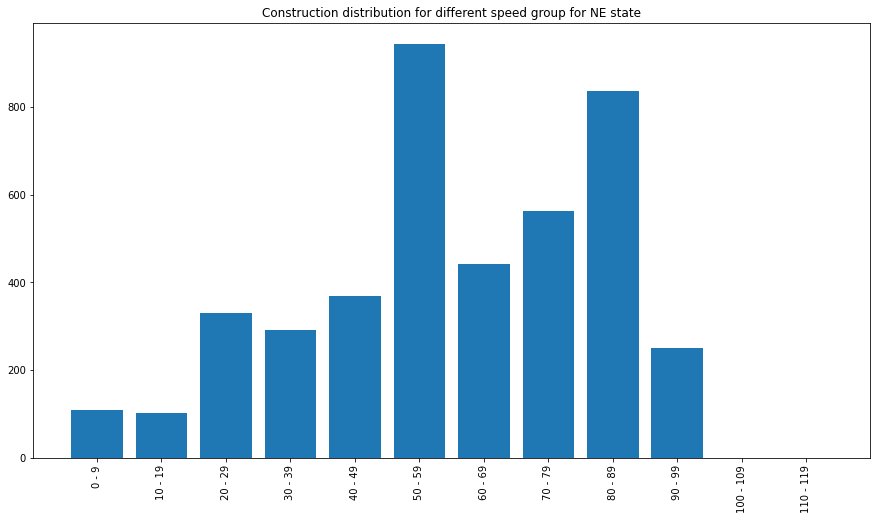

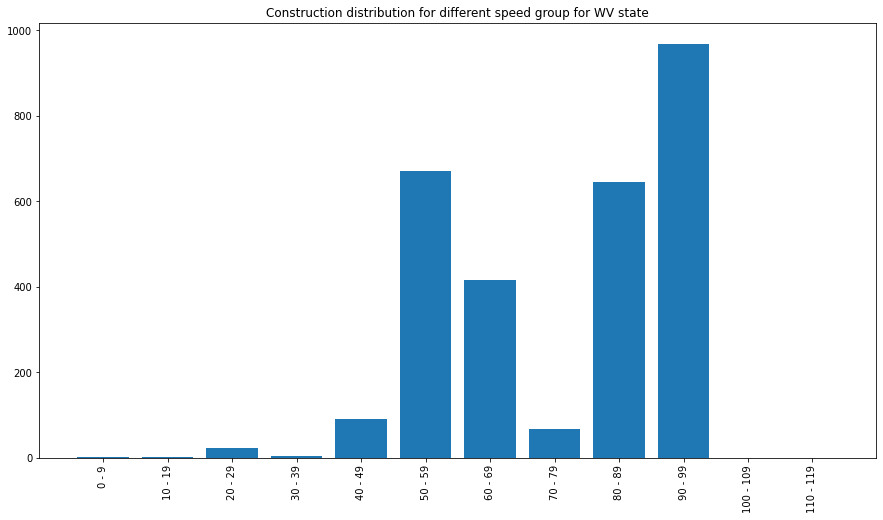

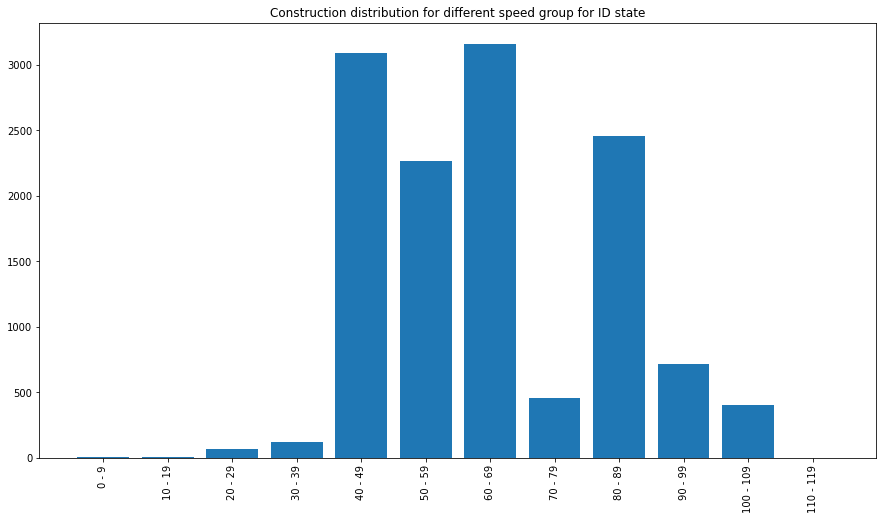

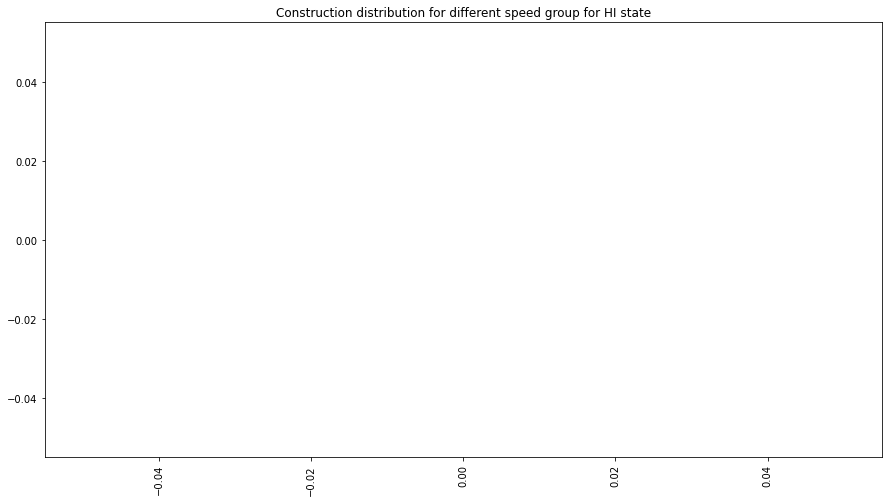

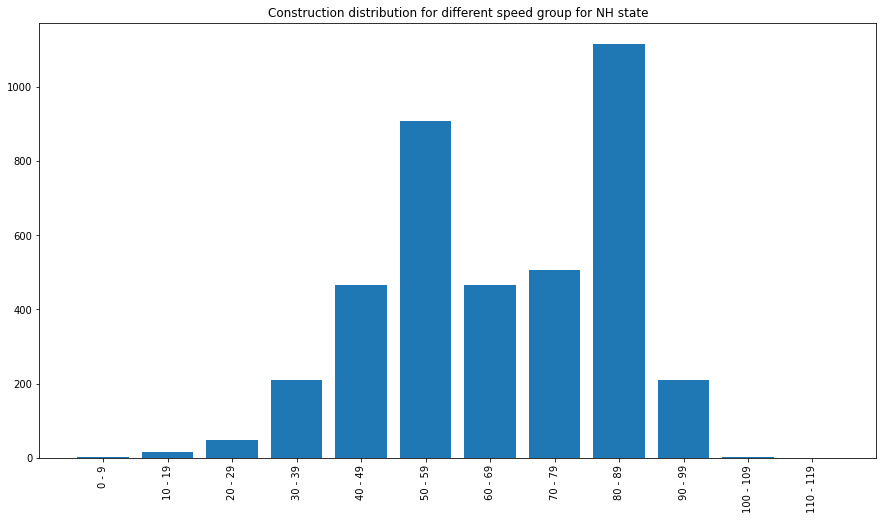

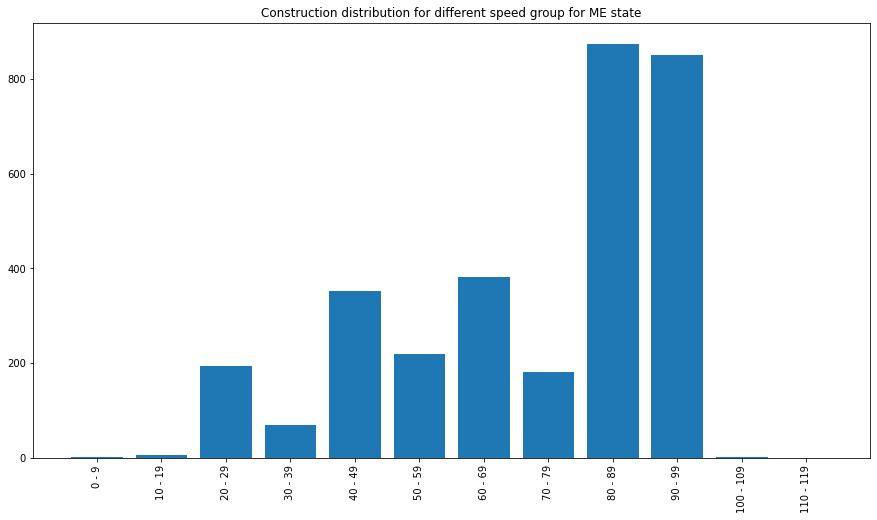

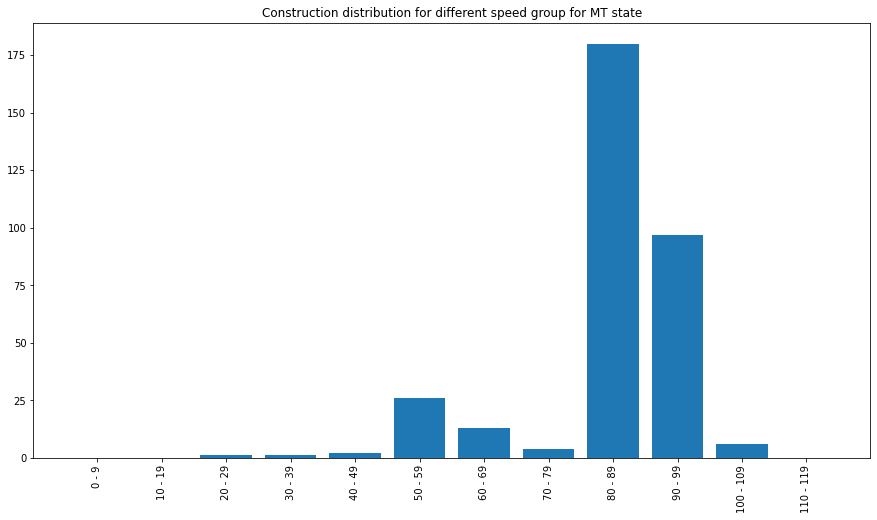

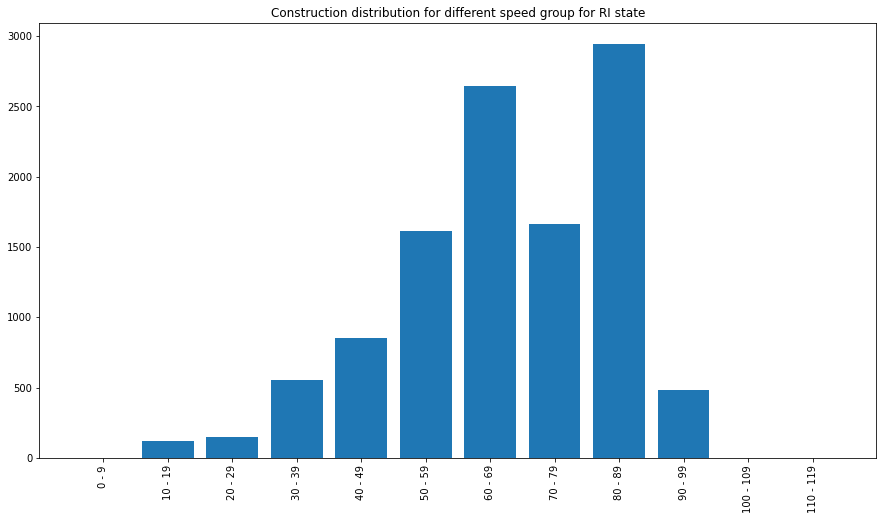

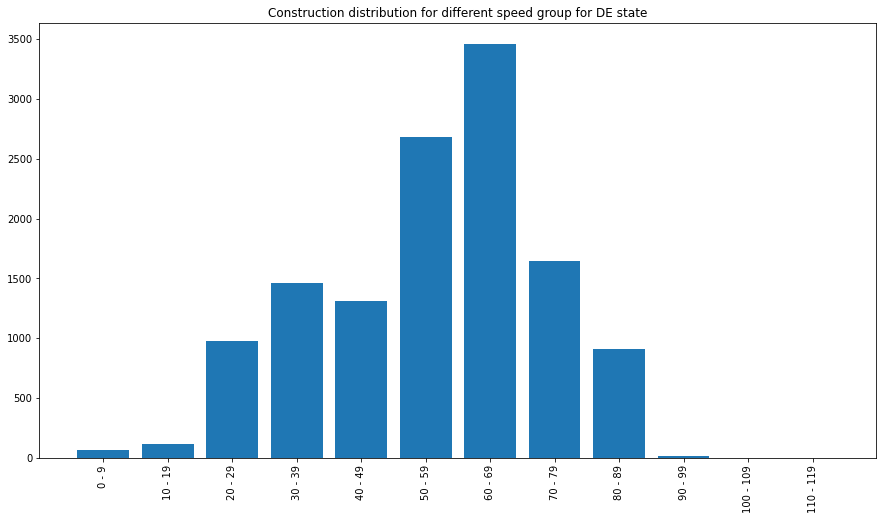

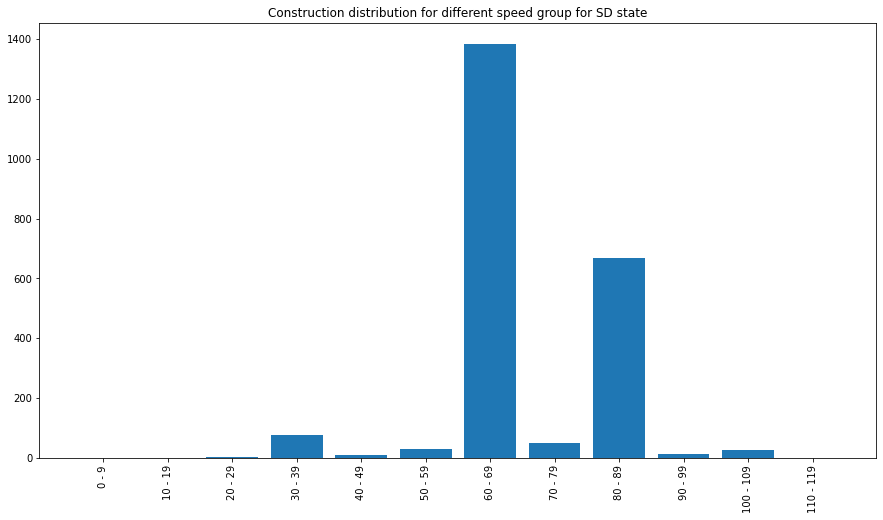

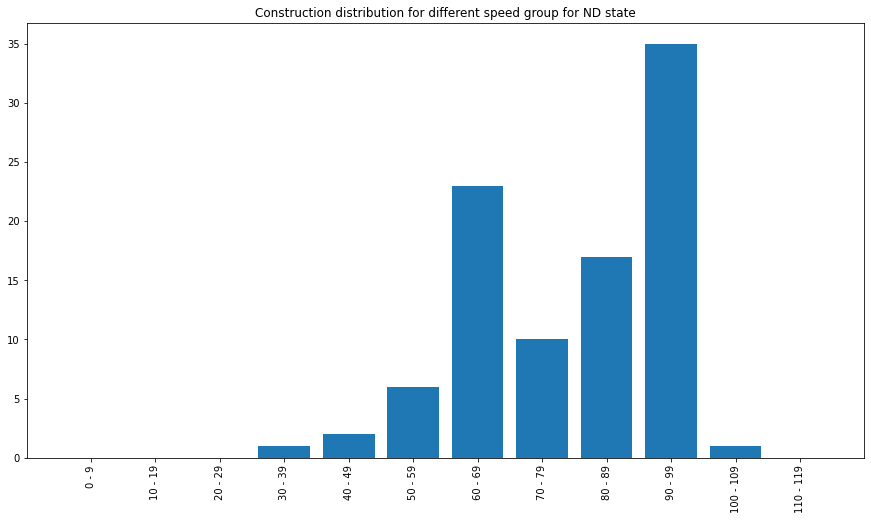

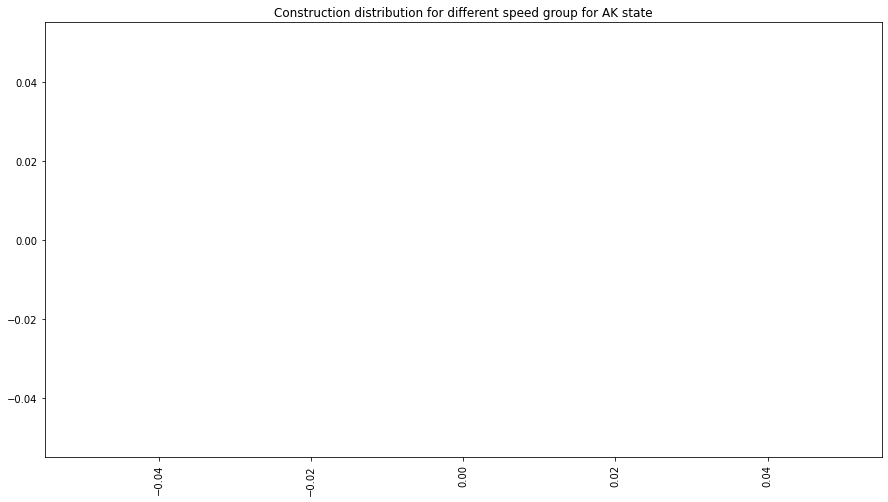

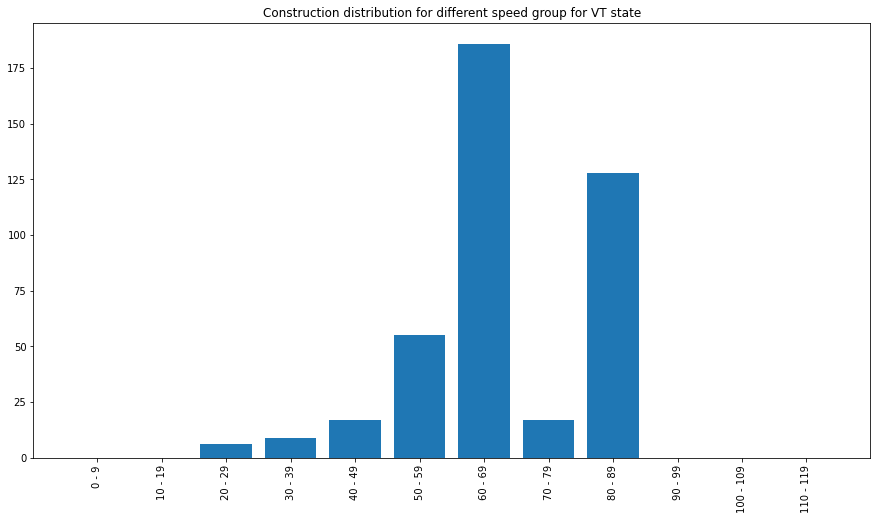

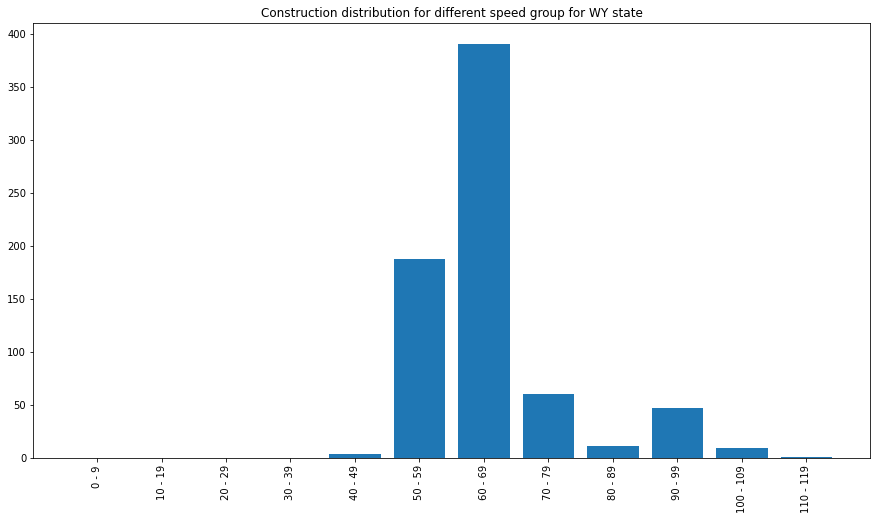

In [61]:
for state in States:
    print(state)
    plt.figure(figsize= (15,8))
    df_temp = df_state_speed_group_count[df_state_speed_group_count.State == state]
    plt.bar(x=df_temp['speed_group'], height=df_temp['counts'])
    a = plt.xticks(rotation = 90)
    plt.title("Construction distribution for different speed group for {} state".format(state))
    plt.savefig("Construction-distribution-different-speed-group-{}-state.png".format(state))

In [20]:
df_city_state_speed_group = df.groupby(["City", "State", "avg_speed_km"])

In [21]:
df_city_state_speed_group_count = df_city_state_speed_group.size().reset_index(name='counts')

In [22]:
df_city_state_speed_group_count.head()

,City,State,avg_speed_km,counts
0,Aaronsburg,PA,64.223545,4
1,Aaronsburg,PA,64.970543,1
2,Abbott,TX,96.468951,1
3,Abbott,TX,96.520797,2
4,Abbott,TX,96.544615,1
